<a href="https://colab.research.google.com/github/google/applied-machine-learning-intensive/blob/master/content/04_classification/04_classification_project/colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Copyright 2020 Google LLC.

In [1]:
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applic
# able law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Classification Project

In this project you will apply what you have learned about classification and TensorFlow to complete a project from Kaggle. The challenge is to achieve a high accuracy score while trying to predict which passengers survived the Titanic ship crash. After building your model, you will upload your predictions to Kaggle and submit the score that you get.

## Team Members  

1. Jose Martinez
2. Wren Priest
3. Maria Quintero

## The Titanic Dataset

[Kaggle](https://www.kaggle.com) has a [dataset](https://www.kaggle.com/c/titanic/data) containing the passenger list on the Titanic. The data contains passenger features such as age, gender, ticket class, as well as whether or not they survived.

Your job is to create a binary classifier using TensorFlow to determine if a passenger survived or not. The `Survived` column lets you know if the person survived. Then, upload your predictions to Kaggle and submit your accuracy score at the end of this Colab, along with a brief conclusion.


To get the dataset, you'll need to accept the competition's rules by clicking the "I understand and accept" button on the [competition rules page](https://www.kaggle.com/c/titanic/rules). Then upload your `kaggle.json` file and run the code below.

In [29]:
! chmod 600 kaggle.json && (ls ~/.kaggle 2>/dev/null || mkdir ~/.kaggle) && cp kaggle.json ~/.kaggle/ && echo 'Done'
! kaggle competitions download -c titanic
! ls

kaggle.json
Done
titanic.zip: Skipping, found more recently modified local copy (use --force to force download)
colab-key.zip  kaggle.json    slides.pptx    titanic.zip
colab.ipynb    slides.md      submission.csv


**Note: If you see a "403 - Forbidden" error above, you still need to click "I understand and accept" on the [competition rules page](https://www.kaggle.com/c/titanic/rules).**

Three files are downloaded:

1. `train.csv`: training data (contains features and targets)
1. `test.csv`: feature data used to make predictions to send to Kaggle
1. `gender_submission.csv`: an example competition submission file

## Step 1: Exploratory Data Analysis

Perform exploratory data analysis and data preprocessing. Use as many text and code blocks as you need to explore the data. Note any findings. Repair any data issues you find.

**Student Solution**

**Imports and acquring data**

In [2]:
import pandas as pd
import tensorflow as tf
import numpy as num
from zipfile import ZipFile
zip_file = ZipFile('titanic.zip')

train_df = pd.read_csv(zip_file.open('train.csv'))
test_df = pd.read_csv(zip_file.open('test.csv'))
# gender_df = pd.read_csv(zip_file.open('gender_submission.csv'))

In [3]:
test_df.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
270,1162,1,"McCaffry, Mr. Thomas Francis",male,46.0,0,0,13050,75.2417,C6,C
212,1104,2,"Deacon, Mr. Percy William",male,17.0,0,0,S.O.C. 14879,73.5000,NaN,S
143,1035,2,"Beauchamp, Mr. Henry James",male,28.0,0,0,244358,26.0000,NaN,S
242,1134,1,"Spedden, Mr. Frederic Oakley",male,45.0,1,1,16966,134.5000,E34,C
239,1131,1,"Douglas, Mrs. Walter Donald (Mahala Dutton)",female,48.0,1,0,PC 17761,106.4250,C86,C


**The Challenge**

>In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

In [4]:
train_df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
586,587,0,2,"Jarvis, Mr. John Denzil",male,47.0,0,0,237565,15.0000,NaN,S
607,608,1,1,"Daniel, Mr. Robert Williams",male,27.0,0,0,113804,30.5000,NaN,S
550,551,1,1,"Thayer, Mr. John Borland Jr",male,17.0,0,2,17421,110.8833,C70,C
497,498,0,3,"Shellard, Mr. Frederick William",male,NaN,0,0,C.A. 6212,15.1000,NaN,S
674,675,0,2,"Watson, Mr. Ennis Hastings",male,NaN,0,0,239856,0.0000,NaN,S
178,179,0,2,"Hale, Mr. Reginald",male,30.0,0,0,250653,13.0000,NaN,S
288,289,1,2,"Hosono, Mr. Masabumi",male,42.0,0,0,237798,13.0000,NaN,S
60,61,0,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
218,219,1,1,"Bazzani, Miss. Albina",female,32.0,0,0,11813,76.2917,D15,C
744,745,1,3,"Stranden, Mr. Juho",male,31.0,0,0,STON/O 2. 3101288,7.9250,NaN,S


---

**Preprocessing: Simplyfying the dataset**

In [5]:
col = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch','Fare', 'Embarked']

# train_df[col+['PassengerId']]
train_df[col]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [7]:
col = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch','Fare', 'Embarked']

train_df = train_df[col]
#test_df  = test_df[col+['PassengerId']]

#177 data points removed
train_df.dropna(inplace = True)
test_df.dropna(inplace=True)
# print(train_df.sample(50))

EmbarkedMap = {
       "S": 0,
       "C": 1, 
       "Q": 2
}
# print(train_df["Embarked"])
Embarked = train_df["Embarked"]
NumericEmbarked = [EmbarkedMap[v] for v in Embarked]
NumericSex = [0 if x == "male" else 1 for x in train_df["Sex"]]
train_df["NumericEmbarked"] = NumericEmbarked
train_df["NumericSex"] = NumericSex
train_df
# train_df = pd.get_dummies(train_df)
#train_df




# Embarked = test_df["Embarked"]
# NumericEmbarked = [EmbarkedMap[v] for v in Embarked]
# NumericSex = [0 if x == "male" else 1 for x in test_df["Sex"]]
# test_df["NumericEmbarked"] = NumericEmbarked
# test_df["NumericSex"] = NumericSex
# tes_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,NumericEmbarked,NumericSex
0,0,3,male,22.0,1,0,7.2500,S,0,0
1,1,1,female,38.0,1,0,71.2833,C,1,1
2,1,3,female,26.0,0,0,7.9250,S,0,1
3,1,1,female,35.0,1,0,53.1000,S,0,1
4,0,3,male,35.0,0,0,8.0500,S,0,0
...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,2,1
886,0,2,male,27.0,0,0,13.0000,S,0,0
887,1,1,female,19.0,0,0,30.0000,S,0,1
889,1,1,male,26.0,0,0,30.0000,C,1,0


In [6]:
# there are 177 rows missing ages!
print(og_df.isna().sum(),'\n')
# there are 86 rows missing ages!
print(og_df.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [8]:
target_column = 'Survived'
feature_columns = [c for c in train_df.columns if c != target_column and c!= 'Embarked' and c!= 'Sex']
target_column, feature_columns

('Survived',
 ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'NumericEmbarked', 'NumericSex'])

**Using Standard Scalar**

In [9]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
# feature_columns
#train_df
train_df[feature_columns]
train_df[feature_columns] = scaler.fit_transform(train_df[feature_columns])
X_train = train_df[feature_columns]
y_train = train_df[target_column]

**Getting target and feature columns**

## Step 2: The Model

Build, fit, and evaluate a classification model. Perform any model-specific data processing that you need to perform. If the toolkit you use supports it, create visualizations for loss and accuracy improvements. Use as many text and code blocks as you need to explore the data. Note any findings.

**Student Solution**

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation=tf.nn.relu, 
                          input_shape=(X_train.columns.size,)),
    tf.keras.layers.Dense(32, activation=tf.nn.relu),
    tf.keras.layers.Dense(16, activation=tf.nn.relu),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

In [11]:
model.compile(
    loss='binary_crossentropy',
    optimizer='Adam',
    metrics=['accuracy']
)

**Early Stopping**

In [12]:
es = tf.keras.callbacks.EarlyStopping(
    monitor='loss',
    min_delta=1e-3,
    patience=5
)

complete_model = model.fit(
    X_train,
    y_train,
    epochs=500,
    verbose=2,
    callbacks=[es]
)
print(complete_model.history['accuracy'][-1])


Train on 712 samples
Epoch 1/500
712/712 - 0s - loss: 0.6501 - accuracy: 0.6756
Epoch 2/500
712/712 - 0s - loss: 0.5472 - accuracy: 0.7893
Epoch 3/500
712/712 - 0s - loss: 0.4770 - accuracy: 0.7879
Epoch 4/500
712/712 - 0s - loss: 0.4475 - accuracy: 0.7907
Epoch 5/500
712/712 - 0s - loss: 0.4314 - accuracy: 0.8034
Epoch 6/500
712/712 - 0s - loss: 0.4217 - accuracy: 0.8202
Epoch 7/500
712/712 - 0s - loss: 0.4159 - accuracy: 0.8230
Epoch 8/500
712/712 - 0s - loss: 0.4108 - accuracy: 0.8301
Epoch 9/500
712/712 - 0s - loss: 0.4050 - accuracy: 0.8301
Epoch 10/500
712/712 - 0s - loss: 0.4034 - accuracy: 0.8329
Epoch 11/500
712/712 - 0s - loss: 0.3985 - accuracy: 0.8329
Epoch 12/500
712/712 - 0s - loss: 0.3950 - accuracy: 0.8287
Epoch 13/500
712/712 - 0s - loss: 0.3923 - accuracy: 0.8399
Epoch 14/500
712/712 - 0s - loss: 0.3901 - accuracy: 0.8427
Epoch 15/500
712/712 - 0s - loss: 0.3880 - accuracy: 0.8441
Epoch 16/500
712/712 - 0s - loss: 0.3855 - accuracy: 0.8427
Epoch 17/500
712/712 - 0s - 

In [42]:
test_df = pd.read_csv(zip_file.open('test.csv'))

col = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch','Fare', 'Embarked', ]

test = test_df.filter(items=col).copy()


#177 data points removed
# test.dropna(inplace = True)
# print(train_df.sample(50))

EmbarkedMap = {
       "S": 0,
       "C": 1, 
       "Q": 2
}
# print(train_df["Embarked"])
Embarked = test["Embarked"]
NumericEmbarked = [EmbarkedMap[v] for v in Embarked]
NumericSex = [0 if x == "male" else 1 for x in test["Sex"]]
test["NumericEmbarked"] = NumericEmbarked
test["NumericSex"] = NumericSex
test
# train_df = pd.get_dummies(train_df)
#train_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,NumericEmbarked,NumericSex
0,3,male,34.5,0,0,7.8292,Q,2,0
1,3,female,47.0,1,0,7.0000,S,0,1
2,2,male,62.0,0,0,9.6875,Q,2,0
3,3,male,27.0,0,0,8.6625,S,0,0
4,3,female,22.0,1,1,12.2875,S,0,1
...,...,...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S,0,0
414,1,female,39.0,0,0,108.9000,C,1,1
415,3,male,38.5,0,0,7.2500,S,0,0
416,3,male,NaN,0,0,8.0500,S,0,0


In [43]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
# feature_columns
#train_df
test[feature_columns]
test[feature_columns] = scaler.fit_transform(test[feature_columns])
test = test[feature_columns].copy()
#y_train = test[target_column]

In [40]:
print(len(test))

87


(array([283.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 135.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

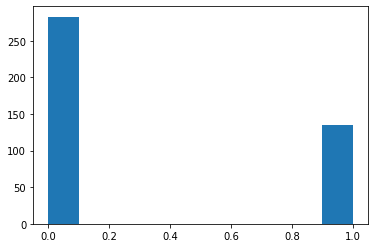

In [44]:
import matplotlib.pyplot as plt


predictions = model.predict(test[feature_columns])

def newRound(i):
    if i>.5:
        return 1
    else:
        return 0
predictions = [newRound(x) for x in predictions]
plt.hist(predictions)

## Step 3: Make Predictions and Upload To Kaggle

In this step you will make predictions on the features found in the `test.csv` file and upload them to Kaggle using the [Kaggle API](https://github.com/Kaggle/kaggle-api). Use as many text and code blocks as you need to explore the data. Note any findings.

**Student Solution**

In [45]:
# test_df['PassengerId']
# predictions
submit_df = pd.DataFrame({
    "PassengerId": test_df['PassengerId'],
    "Survived": predictions
})

submit_df.to_csv(path_or_buf="./submission.csv", index=False)


In [46]:
! cat submission.csv | wc -l

     419


In [ ]:


# test_df.to_csv(path_or_buf= './submission.csv', index=False)

In [79]:
!kaggle competitions submit -c titanic -f submission.csv -m "Message"


100%|██████████████████████████████████████| 2.77k/2.77k [00:00<00:00, 3.46kB/s]
Successfully submitted to Titanic - Machine Learning from Disaster

In [80]:
!kaggle competitions submissions titanic

fileName        date                 description  status    publicScore  privateScore  
--------------  -------------------  -----------  --------  -----------  ------------  
submission.csv  2021-06-30 19:52:56  Message      complete  0.71531      None          
submission.csv  2021-06-30 19:51:20  Message      complete  0.74401      None          
submission.csv  2021-06-30 19:50:06  Message      complete  0.75119      None          
submission.csv  2021-06-30 19:48:01  Message      complete  0.76794      None          
submission.csv  2021-06-30 19:37:47  Message      complete  0.74880      None          
submission.csv  2021-06-30 19:35:33  Message      error     None         None          
submission.csv  2021-06-30 19:33:30  Message      error     None         None          
submission.csv  2021-06-30 18:18:30  None         error     None         None          


In [ ]:
! head submission.csv

PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0,,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,,S
897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.225,,S
898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,,Q
899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0,,S
900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,,C


What was your Kaggle score?

> 75

---

## Step 4: Iterate on Your Model

In this step you're encouraged to play around with your model settings and to even try different models. See if you can get a better score. Use as many text and code blocks as you need to explore the data. Note any findings.

In [68]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation=tf.nn.leaky_relu, 
                          input_shape=(X_train.columns.size,)),
    tf.keras.layers.Dense(32, activation=tf.nn.leaky_relu),
    tf.keras.layers.Dense(16, activation=tf.nn.leaky_relu),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

In [69]:
model.compile(
    loss='binary_crossentropy',
    optimizer='Adam',
    metrics=['accuracy']
)

In [70]:
es = tf.keras.callbacks.EarlyStopping(
    monitor='loss',
    min_delta=1e-3,
    patience=5
)

complete_model = model.fit(
    X_train,
    y_train,
    epochs=500,
    verbose=2,
    callbacks=[es]
)

print(complete_model.history['accuracy'][-1])

Train on 712 samples
Epoch 1/500
712/712 - 0s - loss: 0.6352 - accuracy: 0.7008
Epoch 2/500
712/712 - 0s - loss: 0.5252 - accuracy: 0.8034
Epoch 3/500
712/712 - 0s - loss: 0.4687 - accuracy: 0.7992
Epoch 4/500
712/712 - 0s - loss: 0.4399 - accuracy: 0.8118
Epoch 5/500
712/712 - 0s - loss: 0.4272 - accuracy: 0.8160
Epoch 6/500
712/712 - 0s - loss: 0.4196 - accuracy: 0.8244
Epoch 7/500
712/712 - 0s - loss: 0.4142 - accuracy: 0.8301
Epoch 8/500
712/712 - 0s - loss: 0.4118 - accuracy: 0.8315
Epoch 9/500
712/712 - 0s - loss: 0.4054 - accuracy: 0.8287
Epoch 10/500
712/712 - 0s - loss: 0.4047 - accuracy: 0.8329
Epoch 11/500
712/712 - 0s - loss: 0.4011 - accuracy: 0.8272
Epoch 12/500
712/712 - 0s - loss: 0.3990 - accuracy: 0.8287
Epoch 13/500
712/712 - 0s - loss: 0.3981 - accuracy: 0.8357
Epoch 14/500
712/712 - 0s - loss: 0.3976 - accuracy: 0.8441
Epoch 15/500
712/712 - 0s - loss: 0.3929 - accuracy: 0.8343
Epoch 16/500
712/712 - 0s - loss: 0.3912 - accuracy: 0.8343
Epoch 17/500
712/712 - 0s - 

(array([269.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 149.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

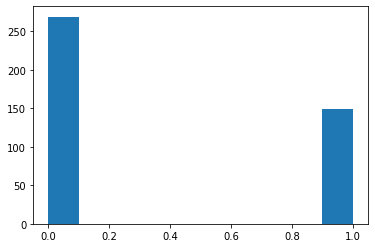

In [81]:
predictions = model.predict(test[feature_columns])

def newRound(i):
    if i>.5:
        return 1
    else:
        return 0
predictions = [newRound(x) for x in predictions]
plt.hist(predictions)

In [78]:
submit_df = pd.DataFrame({
    "PassengerId": test_df['PassengerId'],
    "Survived": predictions
})

submit_df.to_csv(path_or_buf="./submission.csv", index=False)

### Conclusion

The original model implemented return a kaggle score of 75. After iterating through hyperparameters for the model used, changing the activation  function to `leaky model`. This returned a kaggle score of 77.

---